<a href="https://colab.research.google.com/github/woncoh1/era1a5/blob/main/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [1]:
!git clone https://github.com/woncoh1/era1a5.git
# !pip install git+https://github.com/woncoh1/era1a5.git # Need setup.py

Cloning into 'era1a5'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 16 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), 8.57 KiB | 2.14 MiB/s, done.


# Import

In [2]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
# from torchinfo import summary

from era1a5 import model, utils

100%|██████████| 9912422/9912422 [00:00<00:00, 354596336.35it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 35081289.84it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 170830239.02it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2926798.09it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



# Device

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Data

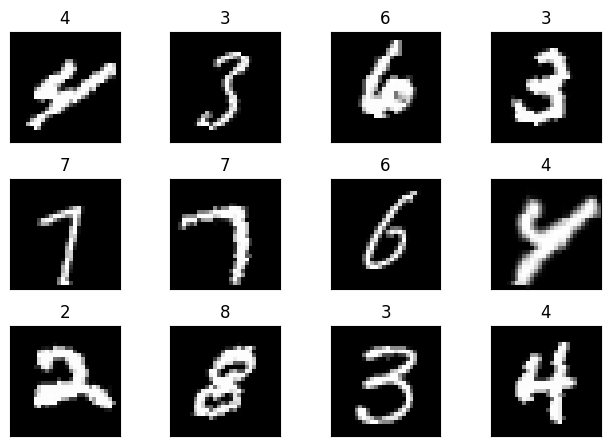

In [4]:
params_dataloader = {
    'batch_size': 128,
    'shuffle': True,
    'num_workers': 0,
    'pin_memory': True,
}

dataloader = {
    'train': torch.utils.data.DataLoader(
        utils.dataset['train'],
        **params_dataloader
    ),
    'test': torch.utils.data.DataLoader(
        utils.dataset['test'],
        **params_dataloader
    ),
}

utils.inspect_batch(dataloader['train'])

# Model

In [5]:
net = model.Net().to(device)
summary(net, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
         MaxPool2d-3           [-1, 64, 12, 12]               0
            Conv2d-4          [-1, 128, 10, 10]          73,728
            Conv2d-5            [-1, 256, 8, 8]         294,912
         MaxPool2d-6            [-1, 256, 4, 4]               0
            Linear-7                   [-1, 50]         204,800
            Linear-8                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.77
Params size (MB): 2.26
Estimated Total Size (MB): 3.03
----------------------------------------------------------------


# Train

In [6]:
params_trainer = {
    'num_epochs': 20,
}
params_optimizer = {
    'lr': 0.01,
    'momentum': 0.9
}
params_scheduler = {
    'step_size': 7,
    'gamma': 0.1,
    'verbose': True,
}

criterion = F.nll_loss
optimizer = optim.SGD(net.parameters(), **params_optimizer)
scheduler = optim.lr_scheduler.StepLR(optimizer, **params_scheduler)

for epoch in range(1, params_trainer['num_epochs']+1):
    print(f'Epoch {epoch}')
    utils.train(net, device, dataloader['train'], optimizer, criterion)
    utils.test(net, device, dataloader['test'], criterion)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0607, Accuracy: 9811/10000 (98.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0414, Accuracy: 9866/10000 (98.66%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0340, Accuracy: 9892/10000 (98.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0287, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0250, Accuracy: 9910/10000 (99.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0252, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0202, Accuracy: 9931/10000 (99.31%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0183, Accuracy: 9933/10000 (99.33%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0179, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0179, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0175, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0175, Accuracy: 9936/10000 (99.36%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0177, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0177, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0174, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 16


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0173, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 17


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0173, Accuracy: 9935/10000 (99.35%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 18


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0172, Accuracy: 9936/10000 (99.36%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 19


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0172, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 20


  0%|          | 0/469 [00:00<?, ?it/s]

Test set: Average loss: 0.0171, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-04.


# Evaluate

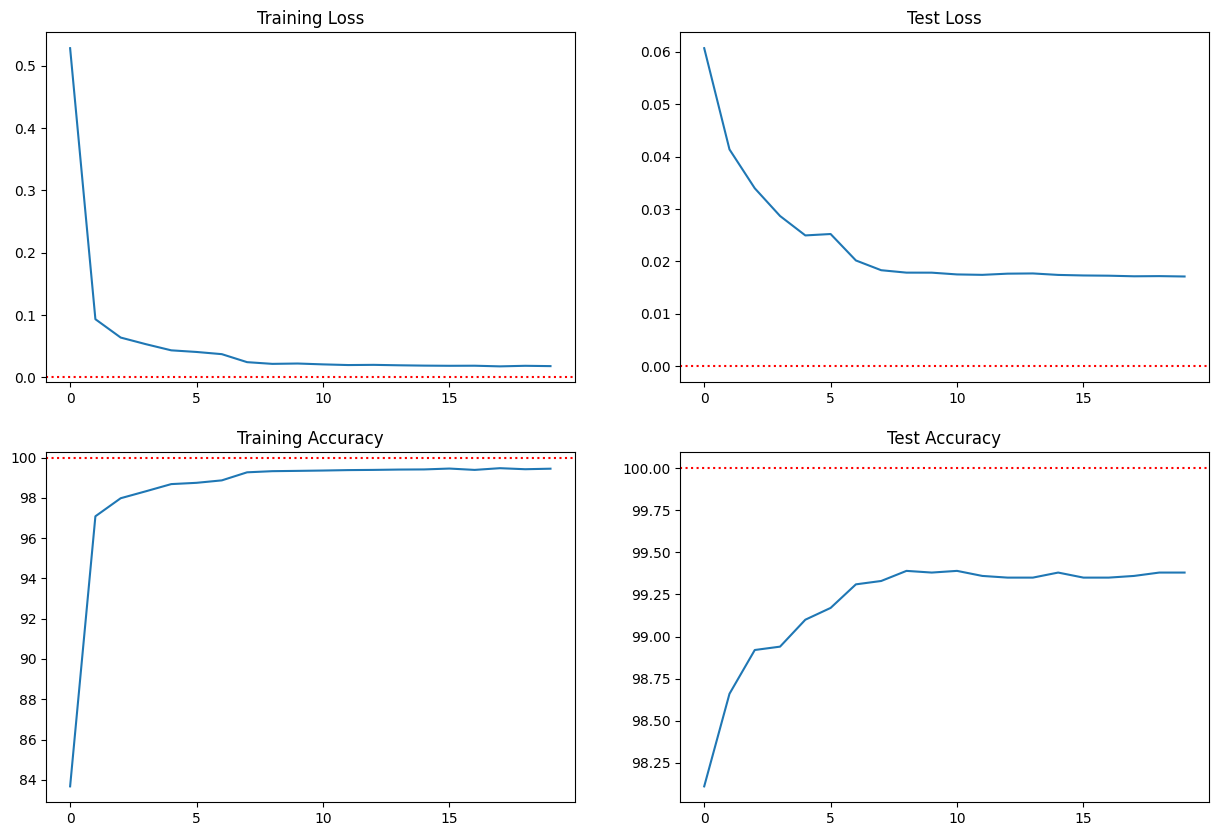

In [7]:
utils.plot_results()